In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch

df = pd.read_csv('UpdatedMatches.csv')
data = []

In [2]:
df['season'].replace({'2008/2009':2008, '2009/2010':2009, '2010/2011':2010, '2011/2012':2011, '2012/2013':2012, '2013/2014':2013, '2014/2015':2014, '2015/2016':2015 },inplace=True)

df["result"] = np.nan
for index, row in df.iterrows():
    if df.loc[index,'home_team_goal'] == df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 1
    if df.loc[index,'home_team_goal'] > df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 2
    if df.loc[index,'home_team_goal'] < df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 0

C:\Users\herath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

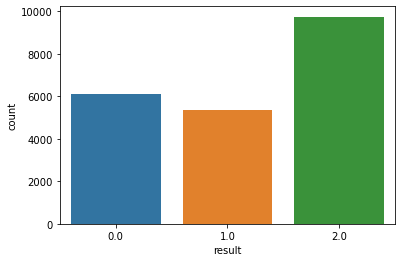

In [3]:
sns.countplot(df.result)

In [5]:
df.result.value_counts()/df.shape[0]

2.0    0.459098
0.0    0.288525
1.0    0.252377
Name: result, dtype: float64

In [6]:
from tqdm import tqdm

def playerfunction( df ):
    for index, row in tqdm(df.iterrows()):
        overall_rating_home_players = []
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_1'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_2'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_3'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_4'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_5'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_6'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_7'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_8'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_9'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_10'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_11'])

        overall_rating_away_players = []
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_1'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_2'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_3'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_4'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_5'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_6'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_7'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_8'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_9'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_10'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_11'])

        overall_rating_matrix = []
        for i in range(11):          
            a =[]
            for j in range(11):
                a.append(overall_rating_home_players[i]-overall_rating_away_players[j])
            overall_rating_matrix.append(a)

        potential_home_players = []
        potential_home_players.append(df.loc[index,'potential_home_player_1'])
        potential_home_players.append(df.loc[index,'potential_home_player_2'])
        potential_home_players.append(df.loc[index,'potential_home_player_3'])
        potential_home_players.append(df.loc[index,'potential_home_player_4'])
        potential_home_players.append(df.loc[index,'potential_home_player_5'])
        potential_home_players.append(df.loc[index,'potential_home_player_6'])
        potential_home_players.append(df.loc[index,'potential_home_player_7'])
        potential_home_players.append(df.loc[index,'potential_home_player_8'])
        potential_home_players.append(df.loc[index,'potential_home_player_9'])
        potential_home_players.append(df.loc[index,'potential_home_player_10'])
        potential_home_players.append(df.loc[index,'potential_home_player_11'])

        potential_away_players = []
        potential_away_players.append(df.loc[index,'potential_away_player_1'])
        potential_away_players.append(df.loc[index,'potential_away_player_2'])
        potential_away_players.append(df.loc[index,'potential_away_player_3'])
        potential_away_players.append(df.loc[index,'potential_away_player_4'])
        potential_away_players.append(df.loc[index,'potential_away_player_5'])
        potential_away_players.append(df.loc[index,'potential_away_player_6'])
        potential_away_players.append(df.loc[index,'potential_away_player_7'])
        potential_away_players.append(df.loc[index,'potential_away_player_8'])
        potential_away_players.append(df.loc[index,'potential_away_player_9'])
        potential_away_players.append(df.loc[index,'potential_away_player_10'])
        potential_away_players.append(df.loc[index,'potential_away_player_11'])

        potential_matrix = []
        for i in range(11):          
            b =[]
            for j in range(11):
                b.append(potential_home_players[i]-potential_away_players[j])
            potential_matrix.append(b)

        crossing_home_players = []
        crossing_home_players.append(df.loc[index,'crossing_home_player_1'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_2'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_3'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_4'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_5'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_6'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_7'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_8'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_9'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_10'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_11'])

        crossing_away_players = []
        crossing_away_players.append(df.loc[index,'crossing_away_player_1'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_2'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_3'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_4'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_5'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_6'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_7'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_8'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_9'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_10'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_11'])

        crossing_matrix = []
        for i in range(11):          
            c =[]
            for j in range(11):
                c.append(crossing_home_players[i]-crossing_away_players[j])
            crossing_matrix.append(c)

        finishing_home_players = []
        finishing_home_players.append(df.loc[index,'finishing_home_player_1'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_2'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_3'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_4'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_5'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_6'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_7'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_8'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_9'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_10'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_11'])

        finishing_away_players = []
        finishing_away_players.append(df.loc[index,'finishing_away_player_1'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_2'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_3'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_4'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_5'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_6'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_7'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_8'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_9'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_10'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_11'])

        finishing_matrix = []
        for i in range(11):          
            d =[]
            for j in range(11):
                d.append(finishing_home_players[i]-finishing_away_players[j])
            finishing_matrix.append(d)


        heading_accuracy_home_players = []
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_1'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_2'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_3'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_4'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_5'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_6'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_7'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_8'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_9'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_10'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_11'])

        heading_accuracy_away_players = []
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_1'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_2'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_3'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_4'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_5'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_6'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_7'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_8'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_9'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_10'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_11'])

        heading_accuracy_matrix = []
        for i in range(11):          
            e =[]
            for j in range(11):
                e.append(heading_accuracy_home_players[i]-heading_accuracy_away_players[j])
            heading_accuracy_matrix.append(e)


        dribbling_home_players = []
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_1'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_2'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_3'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_4'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_5'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_6'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_7'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_8'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_9'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_10'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_11'])

        dribbling_away_players = []
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_1'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_2'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_3'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_4'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_5'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_6'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_7'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_8'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_9'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_10'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_11'])

        dribbling_matrix = []
        for i in range(11):          
            f =[]
            for j in range(11):
                f.append(dribbling_home_players[i]-dribbling_away_players[j])
            dribbling_matrix.append(f)


        free_kick_accuracy_home_players = []
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_1'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_2'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_3'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_4'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_5'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_6'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_7'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_8'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_9'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_10'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_11'])

        free_kick_accuracy_away_players = []
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_1'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_2'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_3'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_4'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_5'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_6'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_7'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_8'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_9'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_10'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_11'])

        free_kick_accuracy_matrix = []
        for i in range(11):          
            g =[]
            for j in range(11):
                g.append(free_kick_accuracy_home_players[i]-free_kick_accuracy_away_players[j])
            free_kick_accuracy_matrix.append(g)

        ball_control_home_players = []
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_1'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_2'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_3'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_4'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_5'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_6'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_7'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_8'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_9'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_10'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_11'])


        ball_control_away_players = []
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_1'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_2'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_3'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_4'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_5'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_6'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_7'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_8'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_9'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_10'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_11'])


        ball_control_matrix = []
        for i in range(11):          
            h =[]
            for j in range(11):
                h.append(ball_control_home_players[i]-ball_control_away_players[j])
            ball_control_matrix.append(h)

        sprint_speed_home_players = []
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_1'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_2'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_3'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_4'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_5'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_6'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_7'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_8'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_9'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_10'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_11'])


        sprint_speed_away_players = []
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_1'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_2'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_3'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_4'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_5'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_6'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_7'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_8'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_9'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_10'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_11'])


        sprint_speed_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(sprint_speed_home_players[i]-sprint_speed_away_players[j])
            sprint_speed_matrix.append(k)

        acceleration_home_players = []
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_1'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_2'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_3'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_4'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_5'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_6'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_7'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_8'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_9'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_10'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_11'])


        acceleration_away_players = []
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_1'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_2'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_3'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_4'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_5'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_6'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_7'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_8'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_9'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_10'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_11'])


        acceleration_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(acceleration_home_players[i]-acceleration_away_players[j])
            acceleration_matrix.append(k)

        strength_home_players = []
        strength_home_players.append(df.loc[index,'strength_home_player_1'])
        strength_home_players.append(df.loc[index,'strength_home_player_2'])
        strength_home_players.append(df.loc[index,'strength_home_player_3'])
        strength_home_players.append(df.loc[index,'strength_home_player_4'])
        strength_home_players.append(df.loc[index,'strength_home_player_5'])
        strength_home_players.append(df.loc[index,'strength_home_player_6'])
        strength_home_players.append(df.loc[index,'strength_home_player_7'])
        strength_home_players.append(df.loc[index,'strength_home_player_8'])
        strength_home_players.append(df.loc[index,'strength_home_player_9'])
        strength_home_players.append(df.loc[index,'strength_home_player_10'])
        strength_home_players.append(df.loc[index,'strength_home_player_11'])


        strength_away_players = []
        strength_away_players.append(df.loc[index,'strength_away_player_1'])
        strength_away_players.append(df.loc[index,'strength_away_player_2'])
        strength_away_players.append(df.loc[index,'strength_away_player_3'])
        strength_away_players.append(df.loc[index,'strength_away_player_4'])
        strength_away_players.append(df.loc[index,'strength_away_player_5'])
        strength_away_players.append(df.loc[index,'strength_away_player_6'])
        strength_away_players.append(df.loc[index,'strength_away_player_7'])
        strength_away_players.append(df.loc[index,'strength_away_player_8'])
        strength_away_players.append(df.loc[index,'strength_away_player_9'])
        strength_away_players.append(df.loc[index,'strength_away_player_10'])
        strength_away_players.append(df.loc[index,'strength_away_player_11'])


        strength_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(strength_home_players[i]-strength_away_players[j])
            strength_matrix.append(k)

        long_shots_home_players = []
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_1'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_2'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_3'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_4'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_5'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_6'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_7'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_8'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_9'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_10'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_11'])


        long_shots_away_players = []
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_1'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_2'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_3'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_4'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_5'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_6'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_7'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_8'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_9'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_10'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_11'])


        long_shots_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(long_shots_home_players[i]-long_shots_away_players[j])
            long_shots_matrix.append(k)


        aggression_home_players = []
        aggression_home_players.append(df.loc[index,'aggression_home_player_1'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_2'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_3'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_4'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_5'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_6'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_7'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_8'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_9'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_10'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_11'])


        aggression_away_players = []
        aggression_away_players.append(df.loc[index,'aggression_away_player_1'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_2'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_3'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_4'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_5'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_6'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_7'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_8'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_9'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_10'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_11'])


        aggression_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(aggression_home_players[i]-aggression_away_players[j])
            aggression_matrix.append(k)


        positioning_home_players = []
        positioning_home_players.append(df.loc[index,'positioning_home_player_1'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_2'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_3'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_4'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_5'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_6'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_7'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_8'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_9'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_10'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_11'])


        positioning_away_players = []
        positioning_away_players.append(df.loc[index,'positioning_away_player_1'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_2'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_3'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_4'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_5'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_6'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_7'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_8'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_9'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_10'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_11'])


        positioning_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(positioning_home_players[i]-positioning_away_players[j])
            positioning_matrix.append(k)

        interceptions_home_players = []
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_1'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_2'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_3'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_4'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_5'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_6'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_7'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_8'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_9'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_10'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_11'])


        interceptions_away_players = []
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_1'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_2'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_3'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_4'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_5'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_6'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_7'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_8'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_9'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_10'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_11'])


        interceptions_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(interceptions_home_players[i]-interceptions_away_players[j])
            interceptions_matrix.append(k)

        penalties_home_players = []
        penalties_home_players.append(df.loc[index,'penalties_home_player_1'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_2'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_3'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_4'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_5'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_6'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_7'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_8'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_9'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_10'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_11'])


        penalties_away_players = []
        penalties_away_players.append(df.loc[index,'penalties_away_player_1'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_2'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_3'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_4'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_5'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_6'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_7'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_8'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_9'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_10'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_11'])


        penalties_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(penalties_home_players[i]-penalties_away_players[j])
            penalties_matrix.append(k)

        marking_home_players = []
        marking_home_players.append(df.loc[index,'marking_home_player_1'])
        marking_home_players.append(df.loc[index,'marking_home_player_2'])
        marking_home_players.append(df.loc[index,'marking_home_player_3'])
        marking_home_players.append(df.loc[index,'marking_home_player_4'])
        marking_home_players.append(df.loc[index,'marking_home_player_5'])
        marking_home_players.append(df.loc[index,'marking_home_player_6'])
        marking_home_players.append(df.loc[index,'marking_home_player_7'])
        marking_home_players.append(df.loc[index,'marking_home_player_8'])
        marking_home_players.append(df.loc[index,'marking_home_player_9'])
        marking_home_players.append(df.loc[index,'marking_home_player_10'])
        marking_home_players.append(df.loc[index,'marking_home_player_11'])


        marking_away_players = []
        marking_away_players.append(df.loc[index,'marking_away_player_1'])
        marking_away_players.append(df.loc[index,'marking_away_player_2'])
        marking_away_players.append(df.loc[index,'marking_away_player_3'])
        marking_away_players.append(df.loc[index,'marking_away_player_4'])
        marking_away_players.append(df.loc[index,'marking_away_player_5'])
        marking_away_players.append(df.loc[index,'marking_away_player_6'])
        marking_away_players.append(df.loc[index,'marking_away_player_7'])
        marking_away_players.append(df.loc[index,'marking_away_player_8'])
        marking_away_players.append(df.loc[index,'marking_away_player_9'])
        marking_away_players.append(df.loc[index,'marking_away_player_10'])
        marking_away_players.append(df.loc[index,'marking_away_player_11'])


        marking_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(marking_home_players[i]-marking_away_players[j])
            marking_matrix.append(k)


        stamina_home_players = []
        stamina_home_players.append(df.loc[index,'stamina_home_player_1'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_2'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_3'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_4'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_5'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_6'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_7'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_8'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_9'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_10'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_11'])


        stamina_away_players = []
        stamina_away_players.append(df.loc[index,'stamina_away_player_1'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_2'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_3'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_4'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_5'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_6'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_7'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_8'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_9'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_10'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_11'])


        stamina_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(stamina_home_players[i]-stamina_away_players[j])
            stamina_matrix.append(k)


        shot_power_home_players = []
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_1'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_2'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_3'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_4'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_5'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_6'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_7'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_8'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_9'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_10'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_11'])


        shot_power_away_players = []
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_1'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_2'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_3'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_4'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_5'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_6'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_7'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_8'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_9'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_10'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_11'])


        shot_power_matrix = []
        for i in range(11):          
            k =[]
            for j in range(11):
                k.append(shot_power_home_players[i]-shot_power_away_players[j])
            shot_power_matrix.append(k)

        player_attributes_3D = []
        player_attributes_3D.append(overall_rating_matrix)
        player_attributes_3D.append(potential_matrix)
        player_attributes_3D.append(crossing_matrix)
        player_attributes_3D.append(finishing_matrix)
        player_attributes_3D.append(heading_accuracy_matrix)
        player_attributes_3D.append(dribbling_matrix)
        player_attributes_3D.append(free_kick_accuracy_matrix)
        player_attributes_3D.append(ball_control_matrix)
        player_attributes_3D.append(sprint_speed_matrix)
        player_attributes_3D.append(acceleration_matrix)
        player_attributes_3D.append(strength_matrix)
        player_attributes_3D.append(long_shots_matrix)
        player_attributes_3D.append(aggression_matrix)
        player_attributes_3D.append(positioning_matrix)
        player_attributes_3D.append(interceptions_matrix)
        player_attributes_3D.append(penalties_matrix)
        player_attributes_3D.append(marking_matrix)
        player_attributes_3D.append(stamina_matrix)
        player_attributes_3D.append(shot_power_matrix)

        data.append(player_attributes_3D)


In [7]:
def teamfunction( df ):
    for index, row in tqdm(df.iterrows()):
        
        home_team = []
        home_team.append(df.loc[index,'buildUpPlaySpeed_home_team'])
        home_team.append(df.loc[index,'buildUpPlayDribbling_home_team'])
        home_team.append(df.loc[index,'buildUpPlayPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationCrossing_home_team'])
        home_team.append(df.loc[index,'chanceCreationShooting_home_team'])
        home_team.append(df.loc[index,'defencePressure_home_team'])
        home_team.append(df.loc[index,'defenceAggression_home_team'])
        home_team.append(df.loc[index,'defenceTeamWidth_home_team'])


        away_team = []
        away_team.append(df.loc[index,'buildUpPlaySpeed_away_team'])
        away_team.append(df.loc[index,'buildUpPlayDribbling_away_team'])
        away_team.append(df.loc[index,'buildUpPlayPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationCrossing_away_team'])
        away_team.append(df.loc[index,'chanceCreationShooting_away_team'])
        away_team.append(df.loc[index,'defencePressure_away_team'])
        away_team.append(df.loc[index,'defenceAggression_away_team'])
        away_team.append(df.loc[index,'defenceTeamWidth_away_team'])


        team_matrix = []
        for i in range(9):          
            m =[]
            for j in range(9):
                m.append(home_team[i]-away_team[j])
            team_matrix.append(m)

        team_details.append(team_matrix)

In [8]:
mod = nn.Sequential(
    nn.Conv2d(in_channels=19, out_channels=1, kernel_size=1, stride=1)
)

In [9]:
X = df.drop(['result','date', 'home_team_goal','away_team_goal'], axis=1)
y = df[['result']]
RANDOM_SEED =42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [10]:
y_train.result.value_counts()/y_train.shape[0]

2.0    0.458637
0.0    0.290715
1.0    0.250647
Name: result, dtype: float64

In [11]:
y_train.result.value_counts()

2.0    7795
0.0    4941
1.0    4260
Name: result, dtype: int64

In [12]:
data = []
playerfunction( X_train )
player_train_data = data
Player_Train = torch.Tensor(np.array(player_train_data))

16996it [06:39, 42.59it/s]


In [13]:
Player_Train = mod(Player_Train.view(Player_Train.shape[0],19,-1,1))


In [14]:
Player_Train.size()

torch.Size([16996, 1, 121, 1])

In [15]:
Player_Train = torch.flatten(Player_Train, start_dim=2)
Player_Train.size()

torch.Size([16996, 1, 121])

In [16]:
data = []
playerfunction( X_test )
player_test_data = data
Player_Test = torch.Tensor(np.array(player_test_data))

4250it [04:13, 16.78it/s]


In [17]:
Player_Test = mod(Player_Test.view(Player_Test.shape[0],19,-1,1))
Player_Test.size()

torch.Size([4250, 1, 121, 1])

In [18]:
Player_Test = torch.flatten(Player_Test, start_dim=2)
Player_Test.size()

torch.Size([4250, 1, 121])

In [19]:
team_details = []
teamfunction( X_train )
team_train_data = team_details
Team_Train = torch.Tensor(np.array(team_train_data))

16996it [00:21, 785.05it/s]


In [20]:
Team_Train.size()

torch.Size([16996, 9, 9])

In [21]:
team_details = []
teamfunction( X_test )
team_test_data = team_details
Team_Test = torch.Tensor(np.array(team_test_data))

4250it [00:05, 732.02it/s]


In [22]:
Team_Test.size()

torch.Size([4250, 9, 9])

In [23]:
y_train = torch.squeeze(torch.LongTensor(np.array(y_train)))

In [24]:
y_train.size()

torch.Size([16996])

In [25]:
y_test = torch.squeeze(torch.LongTensor(np.array(y_test)))

In [26]:
y_test.size()

torch.Size([4250])

In [27]:
Team_Train = torch.flatten(Team_Train, start_dim=1)
Team_Test = torch.flatten(Team_Test, start_dim=1)

In [28]:
Team_Train.size()

torch.Size([16996, 81])

In [29]:
Team_Train = Team_Train.unsqueeze(1)
Team_Train.size()

torch.Size([16996, 1, 81])

In [30]:
Team_Test = Team_Test.unsqueeze(1)
Team_Test.size()

torch.Size([4250, 1, 81])

In [31]:
X_Train_Data = torch.cat((Player_Train, Team_Train ), 2)
X_Train_Data.size()

torch.Size([16996, 1, 202])

In [32]:
X_Test_Data = torch.cat((Player_Test, Team_Test), 2)
X_Test_Data.size()

torch.Size([4250, 1, 202])

In [58]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(X_Train_Data, y_train)
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)


test = data_utils.TensorDataset(X_Test_Data, y_test)
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

In [59]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                # We have in_channels=1 because our input is a grayscale image
                nn.Conv1d(in_channels=1, out_channels=4, kernel_size=20, padding=0, stride=1), # (N, 1, 202) 
                nn.ReLU(),
                nn.BatchNorm1d(4),
                # After the second convolutional layer the output of this layer is:
                # [(202 -20)/1] + 1 = 183
          
                # output of our second conv layer
                nn.Conv1d(in_channels=4, out_channels=8, kernel_size=20, padding=0, stride=1),
                nn.ReLU(),
                nn.BatchNorm1d(8),
                # After the second convolutional layer the output of this layer is:
                # [(183 - 20)/1] + 1 = 164. 
            
                nn.Conv1d(in_channels=8, out_channels=16, kernel_size=20, padding=0, stride=1),
                nn.ReLU(),
                nn.BatchNorm1d(16),
                # After the second convolutional layer the output of this layer is:
                # [(164 - 20)/1] + 1 = 145.
            
                nn.Conv1d(in_channels=16, out_channels=64, kernel_size=20, padding=0, stride=1),
                nn.ReLU(),
                nn.BatchNorm1d(64),
                # After the second convolutional layer the output of this layer is:
                # [(145 - 20)/1] + 1 = 126.
                
                nn.AvgPool1d(126, stride=1)

        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=64 of our second conv layer
                nn.Linear(in_features=64, out_features= 64),          
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=64),
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=64),
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=3) # The output is 10 which should match the size of our class
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        return x

In [60]:
#Doing it on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Network()
net.to(device)

weights = [1/4941, 1/4260, 1/7795 ]
class_weights = torch.FloatTensor(weights)

#Training
optimizer = optim.SGD(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(weight=class_weights)


X_Train_Data = X_Train_Data.to(device)
X_Test_Data = X_Test_Data.to(device)

y_train = y_train.to(device)
y_test = y_test.to(device)

criterion = criterion.to(device)

In [61]:
from sklearn.metrics import f1_score

epochs = 100
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []
train_f1_scores, test_f1_scores = [], []

for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0
    prediction_list_test = []
    prediction_list_train = []
    train_f1score = 0
    test_f1score = 0

    net.train()
    
    total = 0
    # training our model
    for idx, (x, y) in enumerate(train_loader):

        optimizer.zero_grad()

        pred = net(x)
        loss = criterion(pred, y)
        total_train_loss += loss.item()
        loss.backward(retain_graph=True)
        optimizer.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
            y_prediction = torch.max(p.data, 0)[1]
            prediction_list_train.append(y_prediction)
                
    accuracy_train = total / len(X_Train_Data)
    accuracy_total_train.append(accuracy_train)
    
    prediction_stacked_tensor = torch.stack(prediction_list_train)
    train_f1score = f1_score(y_train, prediction_stacked_tensor, average='weighted')
    train_f1_scores.append(train_f1score)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    net.eval()
    total = 0
    for idx, (x, y) in enumerate(test_loader):
        pred = net(x)
        loss = criterion(pred, y)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
            y_prediction = torch.max(p.data, 0)[1]
            prediction_list_test.append(y_prediction)

    accuracy_val = total / len(X_Test_Data)
    accuracy_total_val.append(accuracy_val)
    
    prediction_stacked_tensor = torch.stack(prediction_list_test)
    test_f1score = f1_score(y_test, prediction_stacked_tensor, average='weighted')
    test_f1_scores.append(test_f1score)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 1 == 0:
          print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val),
            "Train F1 Score: {:.4f}  ".format(train_f1score),
            "Test F1 Score: {:.4f}  ".format(test_f1score))

Epoch: 0/100   Training loss: 1.0986   Testing loss: 1.0988   Train accuracy: 0.4576   Test accuracy: 0.4572   Train F1 Score: 0.2985   Test F1 Score: 0.2982  
Epoch: 1/100   Training loss: 1.0986   Testing loss: 1.0988   Train accuracy: 0.4568   Test accuracy: 0.4567   Train F1 Score: 0.2995   Test F1 Score: 0.2966  
Epoch: 2/100   Training loss: 1.0986   Testing loss: 1.0988   Train accuracy: 0.4565   Test accuracy: 0.4569   Train F1 Score: 0.3031   Test F1 Score: 0.3034  
Epoch: 3/100   Training loss: 1.0986   Testing loss: 1.0989   Train accuracy: 0.4563   Test accuracy: 0.4553   Train F1 Score: 0.3035   Test F1 Score: 0.3058  
Epoch: 4/100   Training loss: 1.0986   Testing loss: 1.0987   Train accuracy: 0.4560   Test accuracy: 0.4541   Train F1 Score: 0.3060   Test F1 Score: 0.3067  
Epoch: 5/100   Training loss: 1.0985   Testing loss: 1.0987   Train accuracy: 0.4558   Test accuracy: 0.4532   Train F1 Score: 0.3060   Test F1 Score: 0.3111  
Epoch: 6/100   Training loss: 1.0985   T

KeyboardInterrupt: 

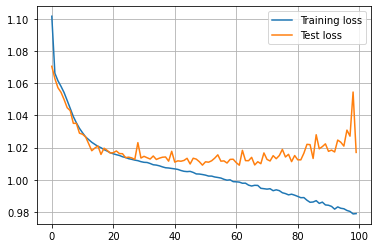

In [72]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

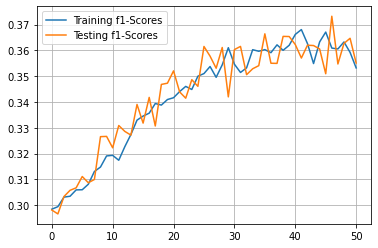

In [62]:
plt.plot(train_f1_scores, label='Training f1-Scores')
plt.plot(test_f1_scores, label='Testing f1-Scores')
plt.legend()
plt.grid()

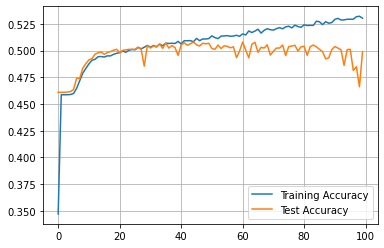

In [73]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()

In [47]:
#saving the model

MODEL_PATH = 'model.pth'
torch.save(net, MODEL_PATH)

In [48]:
net = torch.load(MODEL_PATH)

In [49]:
#Evaluation
classes = ['Loss','Draw','Win']
predict_list = []
y_pred = net(X_Test_Data)

for i, p in enumerate(y_pred):
    y_pred = torch.max(p.data, 0)[1]
    predict_list.append(y_pred)
stacked_tensor = torch.stack(predict_list)
y_test = y_test.cpu()

In [50]:
print(classification_report(y_test, stacked_tensor, target_names=classes))

              precision    recall  f1-score   support

        Loss       0.40      0.53      0.46      1189
        Draw       0.50      0.00      0.00      1102
         Win       0.53      0.73      0.62      1959

    accuracy                           0.49      4250
   macro avg       0.48      0.42      0.36      4250
weighted avg       0.49      0.49      0.41      4250



Text(0.5, 15.0, 'Predicted label')

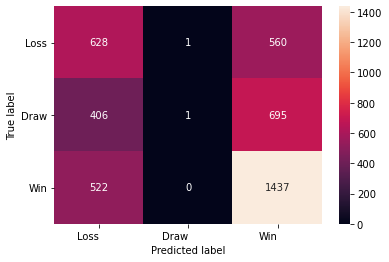

In [51]:
cm = confusion_matrix(y_test, stacked_tensor)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
correct = 0
total = 0

with torch.no_grad():
    for i, (x, y) in enumerate(test_loader):
        outputs = net(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 4250 matches: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 4250 matches: 48 %
